# Vizualizace dat s využitím knihovny Matplotlib

- K vizualizaci v Pandas dochází za pomoci metody plot() využívající sub-modul Pyplot knihovny Matplotlib (samostatná knihovna Python)
- Knihovna pro vizualizaci dat na nízké úrovni (tj. umožňuje bohaté možnosti přizpůsobení vizualizace, nastavení může být složitější)
- Pro vizualizaci jednotlivých bodů slouží metoda plot()
 - metoda přijímá 2 argumenty, první pro body na hodnotě x, druhý pro hodnoty na ose y)
- Pokud nespecifikujeme body na ose x, matplotlib vygeneruje výchozí řadu hodnot
- Jednotlivé typy vizuálů zde https://matplotlib.org/stable/plot_types/index.html
- K vizualizaci dochází v objektu figure (zkráceně fig), do kterého jsou následně dosazovány jednotlivé vizuály (axes)


In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df['DATE']  = pd.to_datetime(df['DATE'])
df.reset_index(inplace=True)

df.columns


Index(['index', 'STATION', 'NAME', 'DATE', 'PRCP', 'SNWD', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')

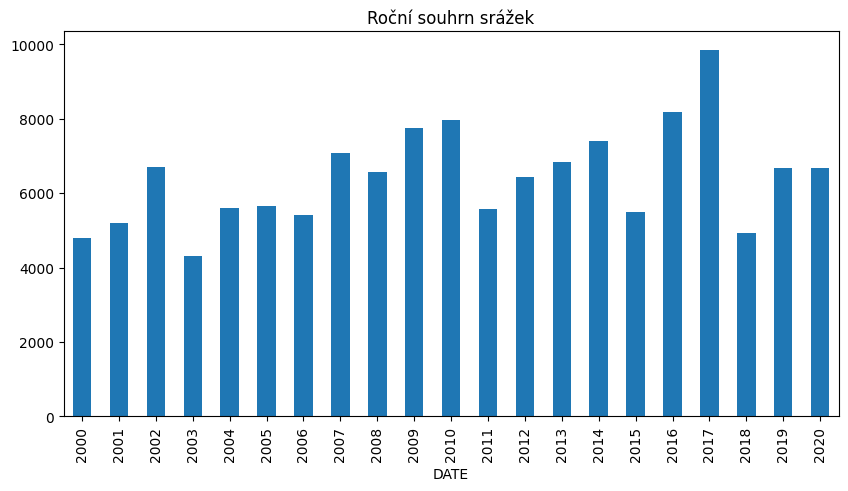

In [2]:
fig = plt.figure()
# Vytvoreni dataframe pro vizualizaci
df_yearly = df.groupby(df['DATE'].dt.year)['PRCP'].sum()
df_yearly.plot(kind='bar',y='PRCP',figsize=(10,5),title='Roční souhrn srážek')
# Zobrazeni grafu
plt.show()

<Figure size 640x480 with 0 Axes>

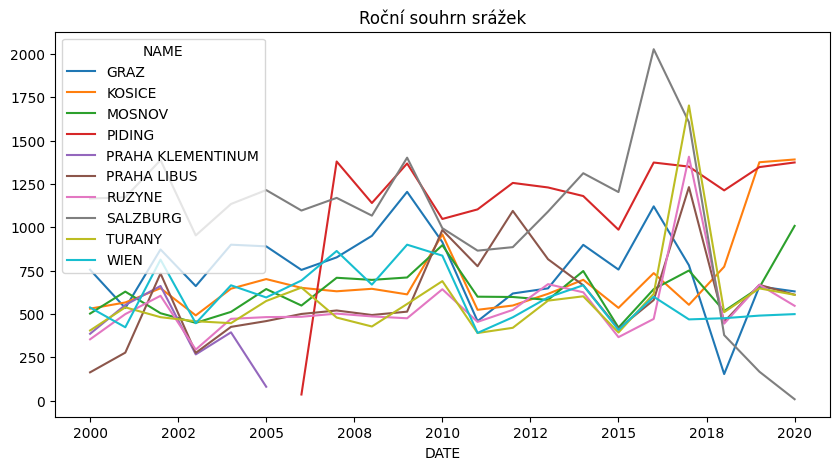

In [3]:
fig = plt.figure()
# Vytvoreni dataframe pro vizualizaci
df_yearly = df.groupby([df['DATE'].dt.year,df['NAME']])['PRCP'].sum()
# Převedení dat do formátu vhodného pro více řad v grafu
df_yearly = df_yearly.unstack()

# Vytvoření grafu a nastavení parametrů
ax = df_yearly.plot(kind='line', figsize=(10,5), title='Roční souhrn srážek')
# Nastavení formátování osy x jako celé číslo
ax.xaxis.set_major_formatter('{:.0f}'.format)
# Zobrazení grafu
plt.show()

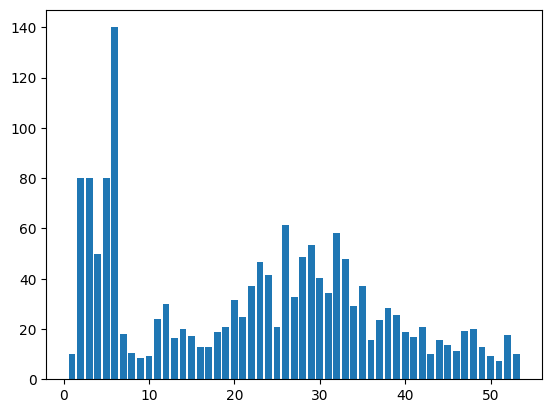

In [4]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df['MESIC'] = df['DATE'].dt.month
df['ROK'] = df['DATE'].dt.year
df['TYDEN'] = df['DATE'].dt.isocalendar().week
df['DATUM'] = df['DATE'].dt.strftime('%Y/%m')

df2 = df.copy()
df2 = df2.groupby(by=['ROK','TYDEN'],as_index=False)['PRCP'].sum()
df2 = df2.groupby(by=['TYDEN'],as_index=False)['PRCP'].mean()
df2 = df2[df2['TYDEN']<53]
plt.bar(df['TYDEN'],df['PRCP'])
plt.rcParams['figure.figsize'] = (30,20)
plt.show()

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df.loc[df['NAME']== 'RUZYNE'][['DATE','PRCP']]
df['DATE']  = pd.to_datetime(df['DATE'])
df.reset_index(inplace=True)

#df.iloc[:100][df.PRCP.notna()]
df.PRCP.notna()

0       False
1       False
2        True
3       False
4       False
        ...  
7596     True
7597     True
7598     True
7599     True
7600     True
Name: PRCP, Length: 7601, dtype: bool

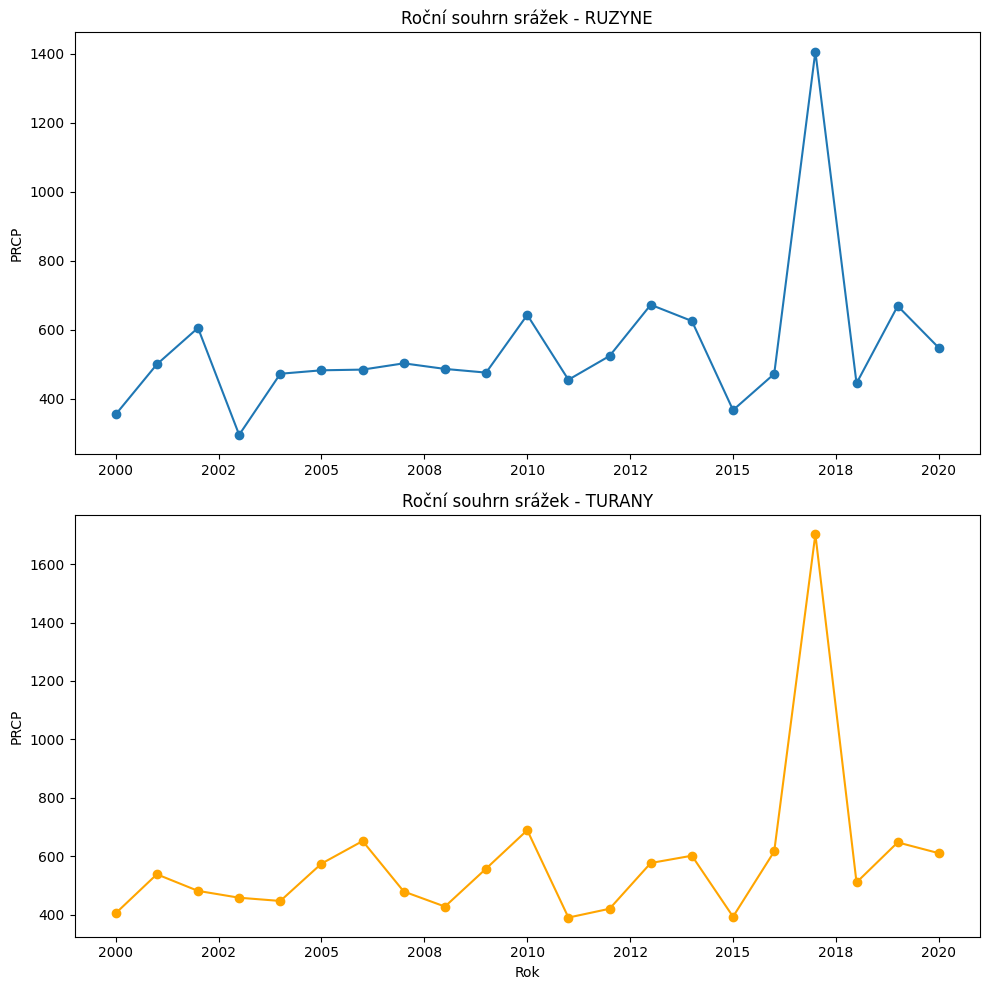

In [9]:
# Načtení dat s použitím středníku jako oddělovače

# Stazeni .csv souboru publikovaneho na github.com
url = "https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv"
df = pd.read_csv(url,delimiter = ';')
df['DATE']  = pd.to_datetime(df['DATE'])
# Skupina podle data a jména, a sečtení srážek

df_yearly = df.groupby([df['DATE'].dt.year, 'NAME'])['PRCP'].sum().reset_index()

# Vytvoření grafu pro RUZYNE a TURANY
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=False)

# Graf pro RUZYNE
ax[0].plot(df_yearly[df_yearly['NAME'] == 'RUZYNE']['DATE'],
           df_yearly[df_yearly['NAME'] == 'RUZYNE']['PRCP'],
           marker='o', label='RUZYNE')
ax[0].set_title('Roční souhrn srážek - RUZYNE')
ax[0].set_ylabel('PRCP')

# Graf pro TURANY
ax[1].plot(df_yearly[df_yearly['NAME'] == 'TURANY']['DATE'],
           df_yearly[df_yearly['NAME'] == 'TURANY']['PRCP'],
           marker='o', color='orange', label='TURANY')
ax[1].set_title('Roční souhrn srážek - TURANY')
ax[1].set_xlabel('Rok')
ax[1].set_ylabel('PRCP')
# Nastavení formátu osy x pro zobrazení pouze celých čísel
ax[0].xaxis.set_major_formatter('{:.0f}'.format)
ax[1].xaxis.set_major_formatter('{:.0f}'.format)

# Zobrazení grafu
plt.tight_layout()
plt.show()
